# Data Cleaning - Broadband V. Mobile, Coverage, and Mobile Phone Cost

In [130]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import seaborn as sns
import plotly.express as px
import hvplot.pandas
import holoviews as hv
from holoviews import opts

## Broadband Top 10 Countries

In [93]:
#Import the complete CSV
data_to_load = Path("Resources/Broadband_10.csv")

broadband_ten_data = pd.read_csv(data_to_load)

#Split into two 
broadband_ten_data = broadband_ten_data.iloc[:, :6]

broadband_ten_data.rename(columns={'Top Country': 'Top Broadband Country'}, inplace=True)

#Show
broadband_ten_data


,Top Broadband Country,Broadband Top 10,Place,Number,Lat,Lng
0,China,360.17,1,10,35.000074,104.999927
1,United States,108.89,2,9,39.783730,-100.445882
2,Japan,40.56,3,8,36.574844,139.239418
3,Germany,33.04,4,7,51.163818,10.447831
4,Russia,30.75,5,6,64.686314,97.745306
5,Brazil,29.15,6,5,-10.333333,-53.200000
6,France,28.44,7,4,46.603354,1.888334
7,United Kingdom,26.02,8,3,54.702354,-3.276575
8,South Korea,21.03,9,2,36.638392,127.696119
9,India,18.31,10,1,22.351115,78.667743


### Broadband Top 10

In [94]:
%%capture --no-display
#Hover Cols
hover = ['Top Broadband Country', 'Broadband Top 10', 'Place']

# Configure the map plot
broadband_1 = broadband_ten_data.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriTerrain",
    frame_width = 500,
    frame_height = 300,
    size = "Broadband Top 10",
    scale = 1.5,
    color = "Broadband Top 10",
    cmap='RdYlGn',
    hover_cols = hover
)

# Display the map
broadband_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Broadband Top 10,Top Broadband Country,Place)

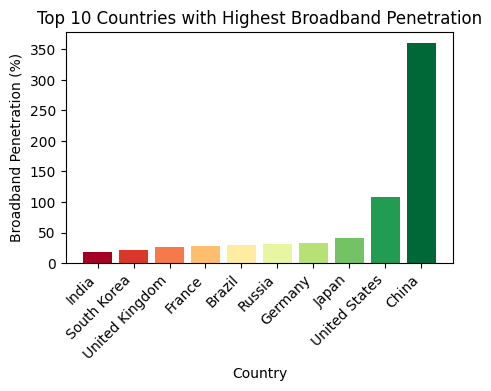

In [95]:
plt.figure(figsize=(5, 3))
broadband_bar = broadband_ten_data.sort_values(by='Broadband Top 10', ascending=True)
ax = plt.bar(broadband_bar['Top Broadband Country'], broadband_bar['Broadband Top 10'], 
             color=plt.cm.RdYlGn(np.linspace(0, 1, len(broadband_bar))))

# Add labels and title
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Broadband Penetration (%)')
plt.title('Top 10 Countries with Highest Broadband Penetration')

# Show the plot
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
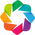

:Bars   [Top Broadband Country]   (Broadband Top 10,Place,Number,Lat,Lng)

In [96]:
top_10 = broadband_ten_data.sort_values(by='Broadband Top 10', ascending=True).head(10)

# Create a HoloViews bar chart
bars_top = hv.Bars(top_10).redim(x='Top Broadband Country', y='Broadband Top 10')

# Customize the plot
bars_top.opts(width=400, height=400, xlabel='Country', xrotation=45, ylabel='Broadband Penetration (%)', 
          title='Top 10 Broadband Penetration', color="green")

# Display the plot
hv.extension('bokeh')  # or 'matplotlib' depending on your preference
bars_top


### Mobile Top 10

In [197]:
#Import the complete CSV
data_to_load = Path("Resources/Mobile_10.csv")

mobile_ten_data = pd.read_csv(data_to_load)

#Split into two 
mobile_ten_data = mobile_ten_data.replace({',': ''}, regex=True)
mobile_ten_data = mobile_ten_data.iloc[:, :6]

mobile_ten_data['Mobile Top 10'] = mobile_ten_data['Mobile Top 10'].astype(float)

mobile_ten_data.rename(columns={'Top Country': 'Top Mobile Country'}, inplace=True)

#Show
mobile_ten_data


,Top Mobile Country,Mobile Top 10,Place,Number,Lat,Lng
0,China,1464.27,1,10,35.000074,104.999927
1,India,1136.05,2,9,22.351115,78.667743
2,United States,410.92,3,8,39.783730,-100.445882
3,Indonesia,361.96,4,7,-2.483383,117.890285
4,Russia,235.72,5,6,64.686314,97.745306
5,Brazil,227.95,6,5,-10.333333,-53.200000
6,Japan,172.96,7,4,36.574844,139.239418
7,Nigeria,165.52,8,3,9.600036,7.999972
8,Bangladesh,150.52,9,2,24.476929,90.293441
9,Pakistan,147.97,10,1,30.330840,71.247499


In [198]:
%%capture --no-display
#Hover Cols
hover = ['Top Mobile Country', 'Mobile Top 10', 'Place']

# Configure the map plot
mobile_1 = mobile_ten_data.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "EsriTerrain",
    frame_width = 500,
    frame_height = 300,
    size = "Mobile Top 10",
    scale = 1.5,
    color = "Mobile Top 10",
    cmap='RdYlGn',
    hover_cols = hover
)

# Display the map
mobile_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Mobile Top 10,Top Mobile Country,Place)

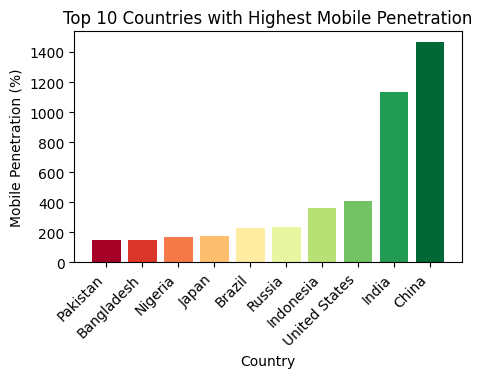

In [200]:
plt.figure(figsize=(5, 3))
mobile_bar = mobile_ten_data.sort_values(by='Mobile Top 10', ascending=True)
ax = plt.bar(mobile_bar['Top Mobile Country'], mobile_bar['Mobile Top 10'], 
             color=plt.cm.RdYlGn(np.linspace(0, 1, len(mobile_bar))))

# Add labels and title
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mobile Penetration (%)')
plt.title('Top 10 Countries with Highest Mobile Penetration')

# Show the plot
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
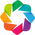

:Bars   [Top Mobile Country]   (Mobile Top 10,Place,Number,Lat,Lng)

In [201]:
top_10_mobile = mobile_ten_data.sort_values(by='Mobile Top 10', ascending=True).head(10)

# Create a HoloViews bar chart
bars_top_mobile = hv.Bars(top_10_mobile).redim(x='Top Mobile Country', y='Mobile Top 10')

# Customize the plot
bars_top_mobile.opts(width=400, height=400, xlabel='Top Mobile Country', xrotation=45, ylabel='Mobile Penetration (%)', 
          ylim=(0, 1600), title='Top 10 Mobile Penetration', color="green")

# Display the plot
hv.extension('bokeh')  # or 'matplotlib' depending on your preference
bars_top_mobile

In [335]:
top_ten_mobile = pd.DataFrame(mobile_ten_data)

# Create hvplot with bars
bars = df.hvplot.bar(x='Top Mobile Country', y=['Mobile Top 10'], stacked=False, color="navy",
                     width=700, height=400, xlabel='Top Mobile Country', ylabel='Values',
                     title='Mobile Top 10 Countries', fontsize={'xticks': 8, 'minor_xticks': 0})

# Apply redim for customization
redim_bars = bars.redim.values(Country=dict(label='Mobile Top 10'))

# Display the plot
redim_bars

:Bars   [Top Mobile Country,Variable]   (value)

### Broadband Top 10 V. Mobile Top 10

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
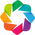

:Layout
   .Bars.I  :Bars   [Top Broadband Country]   (Broadband Top 10,Place,Number,Lat,Lng)
   .Bars.II :Bars   [Top Mobile Country]   (Mobile Top 10,Place,Number,Lat,Lng)

In [134]:
broadband_top = pd.DataFrame(broadband_ten_data)
mobile_top = pd.DataFrame(mobile_ten_data)

# Create HoloViews bar charts
bars1 = hv.Bars(broadband_top).redim(x='Top Broadband Country', 
                                     y='Broadband Top 10').opts(width=400, height=300, xlabel='Country', 
                                                                xrotation=45, ylabel='Broadband Penetration (%)', 
                                                                ylim=(0, 1600), title='Broadband Top 10 Data')
bars2 = hv.Bars(mobile_top).redim(x='Top Mobile Country', 
                                  y='Mobile Top 10').opts(width=400, height=300, xlabel='Country', 
                                                          xrotation=45, ylabel='Mobile Penetration (%)', 
                                                          ylim=(0, 1600), title='Mobile Top 10 Data')

# Overlay the plots
multi_bars = bars1 + bars2

# Display the plot
hv.extension('bokeh')  # or 'matplotlib' depending on your preference
multi_bars


In [293]:
broadband_top = pd.DataFrame(broadband_ten_data)
mobile_top = pd.DataFrame(mobile_ten_data)

# Merge or concatenate the two DataFrames on the 'Country' column
df_combined = pd.merge(broadband_top, mobile_top, on='Place')

# Use hvplot to create a HoloPlot with multiple stacked bars
stacked_bars = df_combined.hvplot.bar(x='Place', y=['Broadband Top 10', 'Mobile Top 10'], stacked=False, 
                                      width=800, height=400, xlabel='Country', rot=90, ylabel='Values', 
                                      title='Stacked Bars from Multiple DataFrames',
                                      color=['navy', 'skyblue'])

# Display the plot
stacked_bars

:Bars   [Place,Variable]   (value)

## Top 10 Countries 2g, 3g, and 4g Coverage

In [147]:
#Import the complete CSV
data_to_load = Path("Resources/Coverage.csv")

coverage_data = pd.read_csv(data_to_load)

unwanted_column = ['Unnamed: 0']
coverage_data.drop(columns=unwanted_column, inplace=True)
coverage_data.rename(columns={'2G Coverage': '2G', '3G Coverage': '3G', '4G Coverage': '4G'}, inplace=True)

#Show
coverage_data

,Country,2G,3G,4G
0,China,99.66,98.06,95.86
1,India,96.81,86.76,71.48
2,United States,99.90,99.90,99.76
3,Indonesia,94.36,84.81,62.64
4,Russia,91.98,78.14,65.74
5,Brazil,94.40,94.17,80.46
6,Japan,99.90,99.90,99.00
7,Nigeria,92.33,59.54,17.21
8,Bangladesh,99.51,89.16,71.60
9,Pakistan,87.70,70.92,49.47


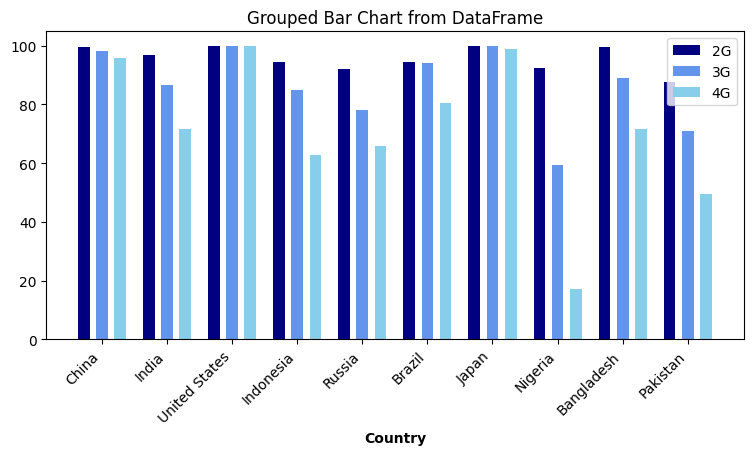

In [257]:
coverage = pd.DataFrame(coverage_data)
plt.figure(figsize=(9, 4))

# Set up positions for bars on x-axis
bar_width = 0.18

space_between_groups = 0.1
twog = np.arange(len(coverage))
threeg = [x + bar_width + space_between_groups for x in twog]
fourg = [x + bar_width + space_between_groups for x in threeg]

# Create grouped bar chart
plt.bar(twog, coverage['2G'], width=bar_width, color='navy', label='2G')
plt.bar(threeg, coverage['3G'], width=bar_width, color='cornflowerblue', label='3G')
plt.bar(fourg, coverage['4G'], width=bar_width, color='skyblue', label='4G')

# Customize the plot
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + bar_width + space_between_groups for r in range(len(coverage))], coverage['Country'])
plt.xticks(rotation=45, ha='right')
plt.title('Grouped Bar Chart from DataFrame')
plt.legend()

# Show the plot
plt.show()

In [265]:
coverage = pd.DataFrame(coverage_data)

# Use hvplot to create a grouped bar chart
grouped_bar_chart = coverage.hvplot.bar(x='Country', y=['2G', '3G', '4G'], groupby='Country',
                                  stacked=False, width=800, height=400, rot=45,
                                  xlabel='Country', ylabel='Values', ylim=(0, 125), 
                                  title='Top 10 Mobile Countries and Coverage', color=['navy', 'cornflowerblue', 'skyblue'])

# Display the plot
grouped_bar_chart

:DynamicMap   [Country]
   :Bars   [Country,Variable]   (value)

In [266]:
# Use hvplot to create a HoloPlot with multiple stacked bars
stacked_bars = coverage_data.hvplot.bar(x='Country', y=['2G', '3G', '4G'], stacked=False, width=800, height=400,
                                      xlabel='Country', ylabel='Values', title='Stacked Bars from Multiple DataFrames',
                                      color=['navy', 'cornflowerblue', 'skyblue'])

# Display the plot
stacked_bars

:Bars   [Country,Variable]   (value)

### Top 10 Countries Cost of Broadband v. Cost of Mobile

In [329]:
#Import the complete CSV
data_to_load = Path("Resources/Cost_comparisons.csv")

cost_data = pd.read_csv(data_to_load)

unwanted_column = ['Unnamed: 0']
cost_data.drop(columns=unwanted_column, inplace=True)
cost_data.rename(columns={'Broadband Cost (% of GNI)': 'Broadband Cost', 
                          'Mobile Cost (% of GNI)': 'Mobile Cost'}, inplace=True)

#Show
cost_data

,Country,Broadband Cost,Mobile Cost
0,China,2.34,0.85
1,India,4.60,2.18
2,United States,0.84,0.15
3,Indonesia,8.94,0.85
4,Russia,0.55,0.24
5,Brazil,2.09,2.18
6,Japan,0.83,1.74
7,Nigeria,14.61,2.43
8,Bangladesh,3.67,3.22
9,Pakistan,5.94,3.32


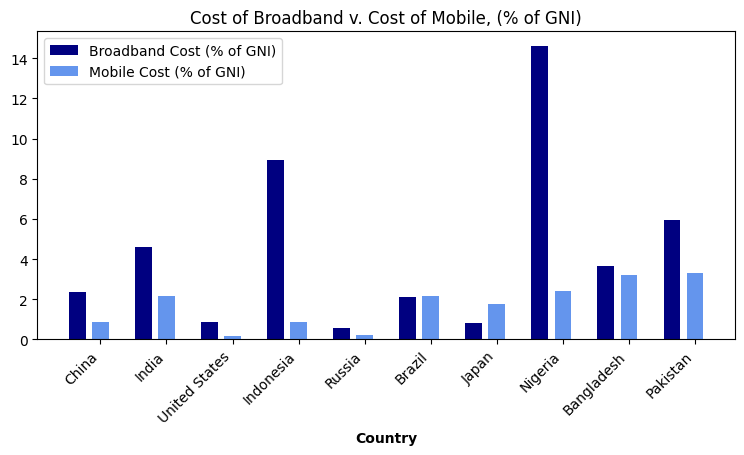

In [334]:
cost = pd.DataFrame(cost_data)
plt.figure(figsize=(9, 4))

# Set up positions for bars on x-axis
bar_width = 0.25

space_between_groups = 0.1
broadband = np.arange(len(cost))
mobile = [x + bar_width + space_between_groups for x in broadband]

# Create grouped bar chart
plt.bar(broadband, cost['Broadband Cost'], width=bar_width, color='navy', label='Broadband Cost (% of GNI)')
plt.bar(mobile, cost['Mobile Cost'], width=bar_width, color='cornflowerblue', label='Mobile Cost (% of GNI)')

# Customize the plot
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + bar_width + space_between_groups for r in range(len(coverage))], coverage['Country'])
plt.xticks(rotation=45, ha='right')
plt.title('Cost of Broadband v. Cost of Mobile, (% of GNI)')
plt.legend()

# Show the plot
plt.show()

In [337]:
#Import the complete CSV
data_to_load = Path("Resources/Cost_comparisons.csv")

cost_data = pd.read_csv(data_to_load)

unwanted_column = ['Unnamed: 0']
cost_data.drop(columns=unwanted_column, inplace=True)
cost_data.rename(columns={'Broadband Cost (% of GNI)': 'BC', 
                          'Mobile Cost (% of GNI)': 'MC'}, inplace=True)

#Show
cost_data

,Country,BC,MC
0,China,2.34,0.85
1,India,4.60,2.18
2,United States,0.84,0.15
3,Indonesia,8.94,0.85
4,Russia,0.55,0.24
5,Brazil,2.09,2.18
6,Japan,0.83,1.74
7,Nigeria,14.61,2.43
8,Bangladesh,3.67,3.22
9,Pakistan,5.94,3.32


In [347]:
# Use hvplot to create a HoloPlot with multiple stacked bars
stacked_bars = cost_data.hvplot.bar(x='Country', y=['BC', 'MC'], stacked=False, width=800, height=400,
                                      xlabel='Country', ylabel='Values', 
                                      title='Cost of Broadband v. Cost of Mobile, (% of GNI)',
                                      color=['navy', 'cornflowerblue', 'skyblue'])
# Display the plot
stacked_bars

:Bars   [Country,Variable]   (value)